In [31]:
# Loading the data
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
meta_data=pd.read_csv('home_data.csv')
# Remove houses that have no price
meta_data = meta_data.drop(['date'], axis=1)
meta_data = meta_data[meta_data.price != 0]

#removing outliers
meta_data = meta_data[meta_data.bedrooms <= 15]
meta_data = meta_data[meta_data.sqft_living <= 10000]
meta_data = meta_data[meta_data.sqft_basement <= 4000]

#assumption of features that are relevant in meta_data
sample_data = meta_data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'view', 'sqft_basement']]

# Splitting the data
X = meta_data.drop(['price'], axis=1)
Y = meta_data['price']

XSample = sample_data.drop(['price'], axis=1)
YSample = sample_data['price']
# Ratio used was 80 for training and 20 for testing
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, test_size=0.2, random_state = 420)

print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(17286, 19) (17286,)
(4322, 19) (4322,)


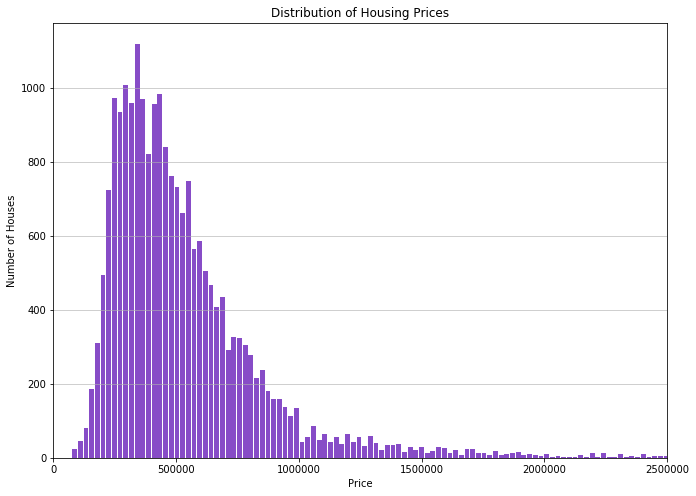

In [2]:
xTrainSample, xTestSample, yTrainSample, yTestSample = train_test_split(XSample,YSample, test_size=0.2, random_state = 420)

fig, ax = plt.subplots(figsize = (11, 8))
n, bins, patches = plt.hist(x=sample_data.price, bins='auto', color='#5500b0', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Number of Houses')
plt.title('Distribution of Housing Prices')
#we limited to 2.5 million because the extra data made the graph harder to inerpret
plt.xlim(0,2500000)
plt.show()

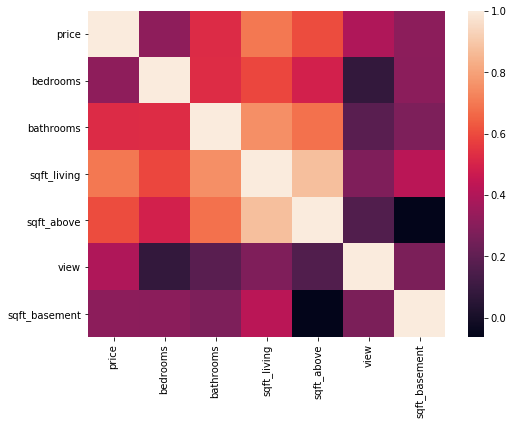

In [3]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(sample_data.corr())

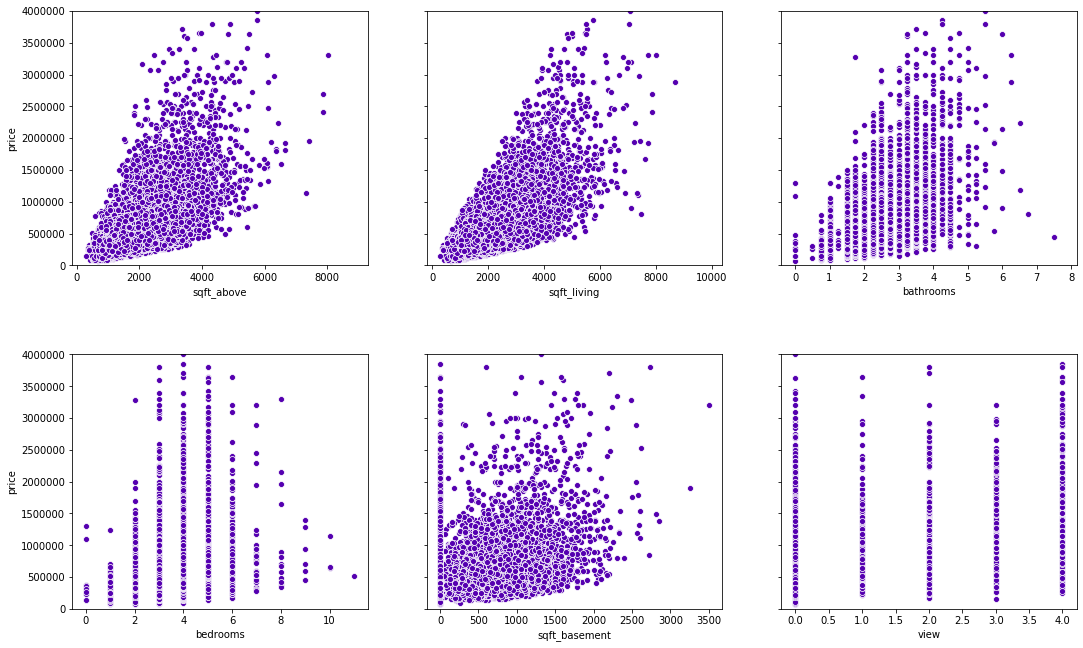

In [4]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (18,11), sharey=True)
fig.subplots_adjust(wspace=.2, hspace=.35)
plt.ylim(0, 4000000)
sns.scatterplot(x=sample_data.sqft_above, y=sample_data.price, ax=ax[0, 0], color='#5500b0', )
sns.scatterplot(x=sample_data.sqft_living, y=sample_data.price, ax=ax[0, 1], color='#5500b0')
sns.scatterplot(x=sample_data.bathrooms, y=sample_data.price, ax=ax[0, 2], color='#5500b0')
sns.scatterplot(x=sample_data.bedrooms, y=sample_data.price, ax=ax[1, 0], color='#5500b0')
sns.scatterplot(x=sample_data.sqft_basement, y=sample_data.price, ax=ax[1, 1], color='#5500b0')
sns.scatterplot(x=sample_data.view, y=sample_data.price, ax=ax[1, 2], color='#5500b0')

The accuracy is:  0.5661008447834498


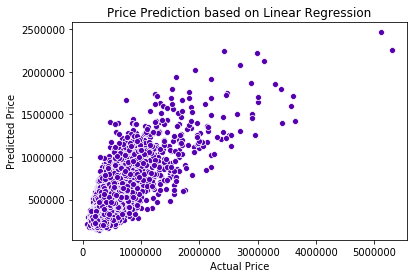

In [9]:
regression = linear_model.LinearRegression()
regression.fit(xTrainSample, yTrainSample)
yPredSample = regression.predict(xTestSample)
sns.scatterplot(yTestSample, yPredSample, color='#5500b0')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Price Prediction based on Linear Regression")
print("The accuracy is: ", regression.score(xTestSample,yTestSample))

The accuracy is:  0.5663320181378375


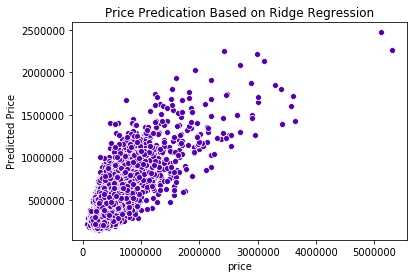

In [10]:
ridge = Ridge()
ridge.fit(xTrainSample,yTrainSample)
yPredRidgeSample = ridge.predict(xTestSample)
ridgeScore = ridge.score(xTestSample,yTestSample)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Predication Based on Ridge Regression')
sns.scatterplot(yTestSample,yPredRidgeSample,color='#5500b0')

print("The accuracy is: ", ridgeScore)

The accuracy is:  0.5401992560333592


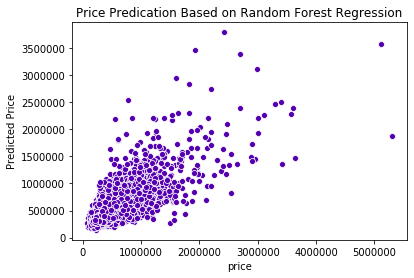

In [11]:
regr = RandomForestRegressor(random_state=420, n_estimators=100)
regr.fit(xTrainSample, yTrainSample)
yPredForestSample = regr.predict(xTestSample)
forestScore = regr.score(xTestSample, yTestSample)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Predication Based on Random Forest Regression')
sns.scatterplot(yTestSample,yPredForestSample,color='#5500b0')

print("The accuracy is: ", forestScore)

M:\Users\Moiz\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116936076604349.12, tolerance: 219817127012.8145
  positive)


The accuracy is:  0.5663334791567083


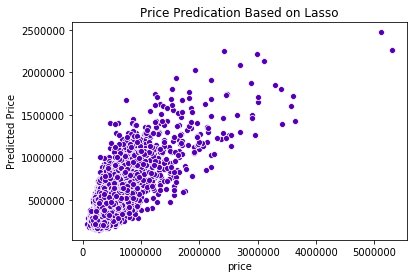

In [12]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(xTrainSample, yTrainSample)
yPredLassoSample = reg.predict(xTestSample)
lassoScore = reg.score(xTestSample, yTestSample)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Predication Based on Lasso')
sns.scatterplot(yTestSample, yPredLassoSample, color='#5500b0')
print("The accuracy is: ", lassoScore)

The accuracy is:  0.5683384975584607


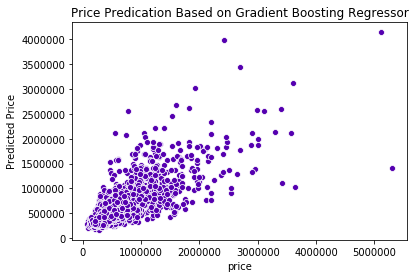

In [13]:
gbr = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
gbr.fit(xTrainSample, yTrainSample)
predGBRSample = gbr.predict(xTestSample)
scoreGBR = gbr.score(xTestSample, yTestSample)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Predication Based on Gradient Boosting Regressor')
sns.scatterplot(yTestSample, predGBRSample, color='#5500b0')
print("The accuracy is: ", scoreGBR)

M:\Users\Moiz\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 533443545918072.06, tolerance: 219817127012.8145
  positive)


The accuracy is:  0.5494454909189357


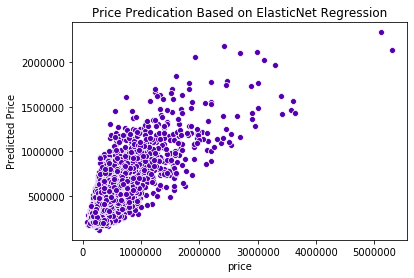

In [14]:
eN = ElasticNet()
eN.fit(xTrainSample, yTrainSample)
yPredEN = eN.predict(xTestSample)
eNScore = eN.score(xTestSample, yTestSample)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Predication Based on ElasticNet Regression')
sns.scatterplot(yTestSample, yPredEN, color='#5500b0')

print('The accuracy is: ',eNScore)

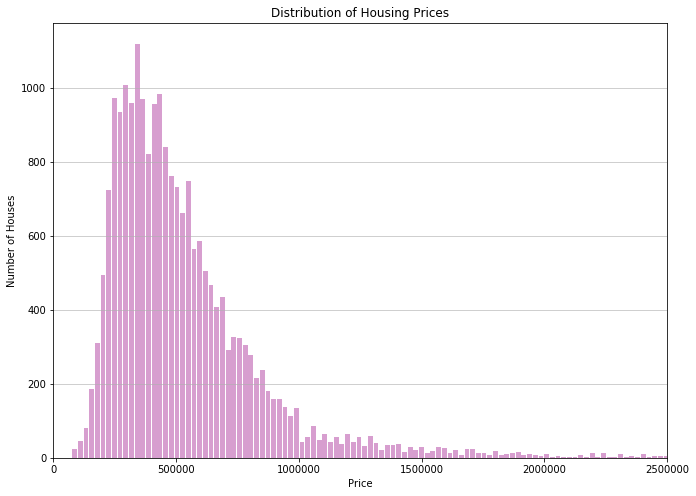

In [15]:
# Plot of the distribution of the housing prices
fig, ax = plt.subplots(figsize = (11, 8))
n, bins, patches = plt.hist(x=meta_data.price, bins='auto', color='#c775bb', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Number of Houses')
plt.title('Distribution of Housing Prices')
#we limited to 2.5 million because the extra data made the graph harder to inerpret
plt.xlim(0,2500000)
plt.show()

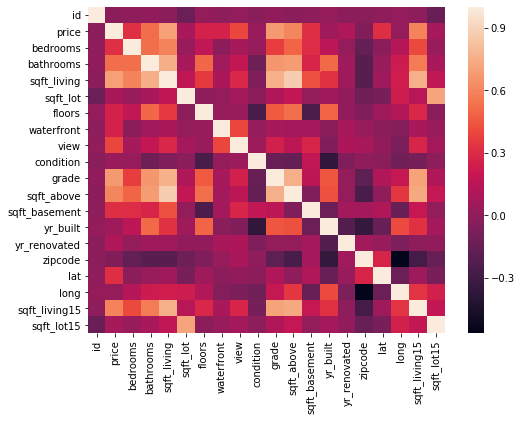

In [95]:
# This heatmap is portraying the correlation between the attributes.
# Specifically we are looking at the correlation to the price
# From this heatmap we can see that we are taking sqft above, sqft living, bathrooms, bedrooms, floors, view, sqft basement as the rest are not so relevant
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(meta_data.corr())

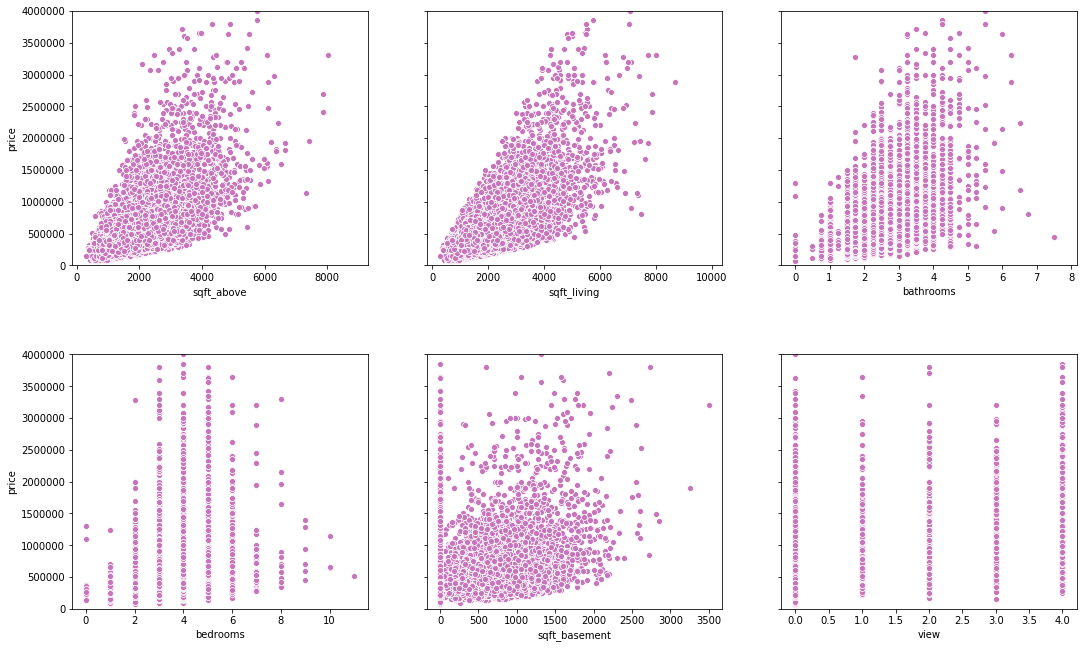

In [96]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (18,11), sharey=True)
fig.subplots_adjust(wspace=.2, hspace=.35)
plt.ylim(0, 4000000)
sns.scatterplot(x=meta_data.sqft_above, y=meta_data.price, ax=ax[0, 0], color='#c775bb', )
sns.scatterplot(x=meta_data.sqft_living, y=meta_data.price, ax=ax[0, 1], color='#c775bb')
sns.scatterplot(x=meta_data.bathrooms, y=meta_data.price, ax=ax[0, 2], color='#c775bb')
sns.scatterplot(x=meta_data.bedrooms, y=meta_data.price, ax=ax[1, 0], color='#c775bb')
sns.scatterplot(x=meta_data.sqft_basement, y=meta_data.price, ax=ax[1, 1], color='#c775bb')
sns.scatterplot(x=meta_data.view, y=meta_data.price, ax=ax[1, 2], color='#c775bb')

The accuracy is:  0.7255975145661604


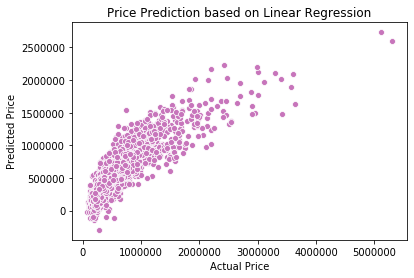

In [16]:
regression = linear_model.LinearRegression()
regression.fit(xTrain, yTrain)
yPred = regression.predict(xTest)
sns.scatterplot(yTest, yPred, color='#c775bb')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Price Prediction based on Linear Regression")
print("The accuracy is: ", regression.score(xTest,yTest))

The accuracy is:  0.6450451755950376


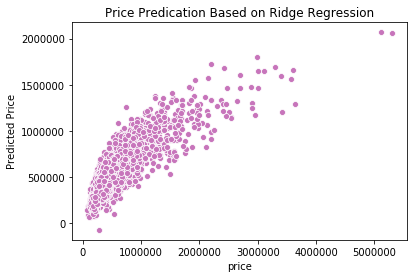

In [134]:
ridge = Ridge(normalize=True)
ridge.fit(xTrain,yTrain)
yPredRidge = ridge.predict(xTest)
ridgeScore = ridge.score(xTest,yTest)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Predication Based on Ridge Regression')
sns.scatterplot(yTest,yPredRidge,color='#c775bb')

print("The accuracy is: ", ridgeScore)

The accuracy is:  0.8805484154050562


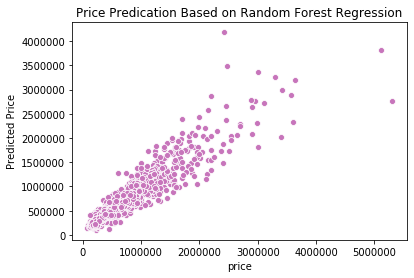

In [138]:
regr = RandomForestRegressor(n_estimators=100)
regr.fit(xTrain, yTrain)
yPredForest = regr.predict(xTest)
forestScore = regr.score(xTest, yTest)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Predication Based on Random Forest Regression')
sns.scatterplot(yTest,yPredForest,color='#c775bb')

print("The accuracy is: ", forestScore)

M:\Users\Moiz\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305811343860267.3, tolerance: 219817127012.8145
  positive)


The accuracy is:  0.7255925817772928


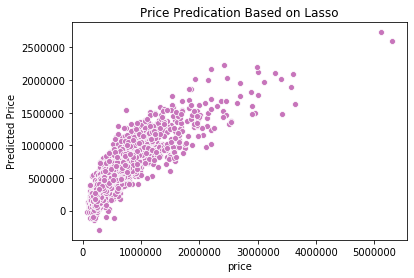

In [17]:
# YOUR CODE HERE
reg = linear_model.Lasso()
reg.fit(xTrain, yTrain)
yPredLasso = reg.predict(xTest)
lassoScore = reg.score(xTest, yTest)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Predication Based on Lasso')
sns.scatterplot(yTest, yPredLasso, color='#c775bb')
print("The accuracy is: ", lassoScore)

The accuracy is:  0.8997314036068549


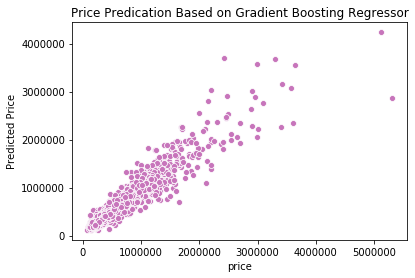

In [18]:
gbr = GradientBoostingRegressor(n_estimators = 400,random_state=420, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
gbr.fit(xTrain, yTrain)
predGBR = gbr.predict(xTest)
scoreGBR = gbr.score(xTest, yTest)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Predication Based on Gradient Boosting Regressor')
sns.scatterplot(yTest, predGBR, color='#c775bb')
print("The accuracy is: ", scoreGBR)

M:\Users\Moiz\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451408704144591.3, tolerance: 219817127012.8145
  positive)


The accuracy is:  0.6363168531890624


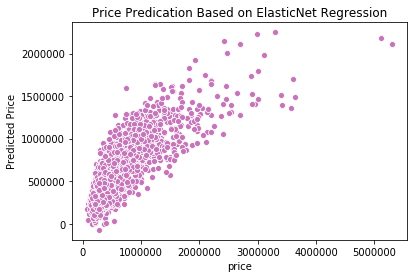

In [36]:
eN = ElasticNet()
eN.fit(xTrain, yTrain)
yPredEN = eN.predict(xTest)
eNScore = eN.score(xTest, yTest)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Predication Based on ElasticNet Regression')
sns.scatterplot(yTest, yPredEN, color='#c775bb')

print('The accuracy is: ',eNScore)

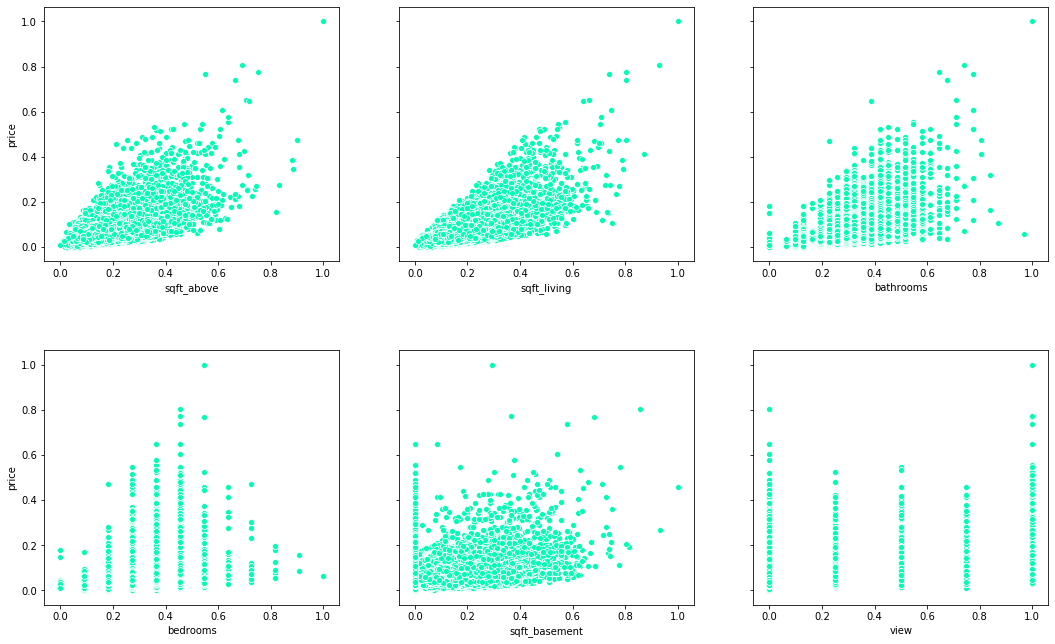

In [3]:
x = meta_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalizedData = pd.DataFrame(x_scaled, columns=meta_data.columns)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (18,11), sharey=True)
fig.subplots_adjust(wspace=.2, hspace=.35)
#plt.ylim(0, 4000000)
sns.scatterplot(x=normalizedData.sqft_above, y=normalizedData.price, ax=ax[0, 0], color='#03fcb5', )
sns.scatterplot(x=normalizedData.sqft_living, y=normalizedData.price, ax=ax[0, 1], color='#03fcb5')
sns.scatterplot(x=normalizedData.bathrooms, y=normalizedData.price, ax=ax[0, 2], color='#03fcb5')
sns.scatterplot(x=normalizedData.bedrooms, y=normalizedData.price, ax=ax[1, 0], color='#03fcb5')
sns.scatterplot(x=normalizedData.sqft_basement, y=normalizedData.price, ax=ax[1, 1], color='#03fcb5')
sns.scatterplot(x=normalizedData.view, y=normalizedData.price, ax=ax[1, 2], color='#03fcb5')


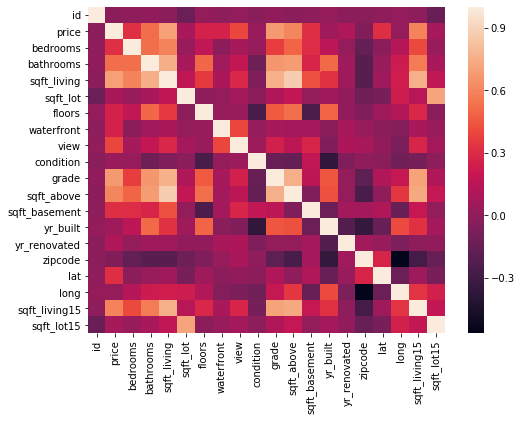

In [4]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(normalizedData.corr())

XN = normalizedData.drop(['price'], axis=1)
YN = normalizedData['price']
# Ratio used was 80 for training and 20 for testing
xTrainNorm, xTestNorm, yTrainNorm, yTestNorm = train_test_split(XN,YN, test_size=0.2, random_state = 420)

The accuracy is:  0.7255975145661482


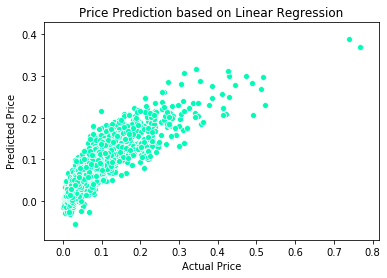

In [122]:
regression = linear_model.LinearRegression()
regression.fit(xTrainNorm, yTrainNorm)
yPredNorm = regression.predict(xTestNorm)
sns.scatterplot(yTestNorm, yPredNorm, color='#03fcb5')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Price Prediction based on Linear Regression")
print("The accuracy is: ", regression.score(xTestNorm,yTestNorm))

The accuracy is:  0.882710530840078


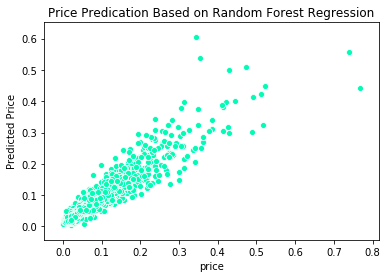

In [137]:
# YOUR CODE HERE
regr = RandomForestRegressor(n_estimators=100)
regr.fit(xTrainNorm, yTrainNorm)
yPredForestNorm = regr.predict(xTestNorm)
forestScore = regr.score(xTestNorm, yTestNorm)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Predication Based on Random Forest Regression')
sns.scatterplot(yTestNorm,yPredForestNorm,color='#03fcb5')

print("The accuracy is: ", forestScore)

The accuracy is:  0.7254983668318528


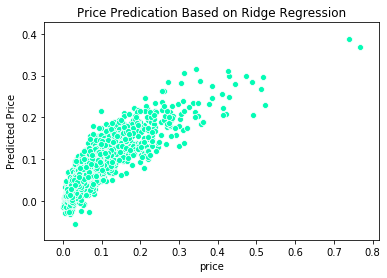

In [25]:
ridge = Ridge()
ridge.fit(xTrainNorm,yTrainNorm)
yPredRidgeNorm = ridge.predict(xTestNorm)
ridgeScore = ridge.score(xTestNorm,yTestNorm)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Predication Based on Ridge Regression')
sns.scatterplot(yTestNorm,yPredRidgeNorm,color='#03fcb5')

print("The accuracy is: ", ridgeScore)

The accuracy is:  0.9007321973889015


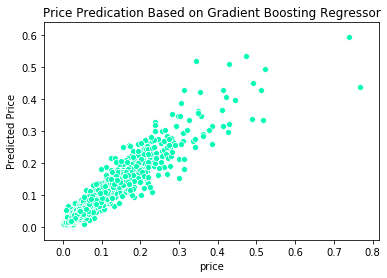

In [56]:
gbr = GradientBoostingRegressor(n_estimators = 400, random_state=420, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1)
gbr.fit(xTrainNorm, yTrainNorm)
predGBRNorm = gbr.predict(xTestNorm)
scoreGBR = gbr.score(xTestNorm, yTestNorm)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Predication Based on Gradient Boosting Regressor')
sns.scatterplot(yTestNorm, predGBRNorm, color='#03fcb5')
print("The accuracy is: ", scoreGBR)

The accuracy is:  0.8739101998637709


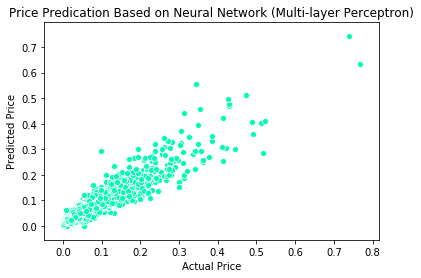

In [30]:
mlp = MLPRegressor(hidden_layer_sizes=(1250,), random_state=420, max_iter=300, early_stopping=True)
mlp.fit(xTrainNorm, yTrainNorm)
yPredMLPNorm = mlp.predict(xTestNorm)
mlpScore = mlp.score(xTestNorm, yTestNorm)
sns.scatterplot(yTestNorm, yPredMLPNorm, color='#03fcb5')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Predication Based on Neural Network (Multi-layer Perceptron)')
print('The accuracy is: ',mlpScore)